In [151]:
import os, time, datetime
import numpy as np
import cv2
from PIL import Image
from skimage.io import imread, imsave, imshow
from scipy import ndimage as ndi
from skimage import feature
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#'C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/results/Set68/test001_dncnn.png'
#'C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/data/Test/Set68/test001.png'

def show_residual(image_set, sigma):
    for i in range(1,100):
        if image_set is 'CBSD68':
            #C:\Users\nuguz\Documents\GitHub\DnCNN\results\CBSD68\noise=25
            if i>68:
                break
            path = "C:/Users/nuguz/Documents/GitHub/DnCNN/results/CBSD68/noise=" + str(sigma) + "/" + str(i)
            label_path = "C:/Users/nuguz/Documents/GitHub/DnCNN/results/CBSD68_label/" + str(i)
        
        elif image_set is 'Set12':
            if i>12:
                break
            path = "C:/Users/nuguz/Documents/GitHub/DnCNN/results/Set12/DnCNN/noise=" + str(sigma) + "/" + str(i)
            label_path = "C:/Users/nuguz/Documents/GitHub/DnCNN/results/Set12_label/" + str(i)
        
        origin = np.array(imread(label_path+'.png', dtype=np.float32))
        noise = np.array(imread(path+'_noise.png', dtype=np.float32))
        denoised = np.array(imread(path+'_dncnn.png', dtype=np.float32))
        
        structure = origin - denoised
        structure = np.clip(5 * np.clip(structure,0,255),0,255)
        cv2.imwrite(path+'_structure.png', structure)
        
        
        residual = noise - denoised
        print(np.min(residual),np.min(residual)+(np.mean(residual)-np.min(residual))/2, np.max(residual)-(np.max(residual)-np.mean(residual))/2, np.max(residual) )
        mapping = interp1d([np.min(residual),np.min(residual)+(np.mean(residual)-np.min(residual))/2, \
                            np.max(residual)-(np.max(residual)-np.mean(residual))/2,np.max(residual)], [-30,30,140,270])
        residual = np.clip(mapping(residual),0,255)
        cv2.imwrite(path+'_residual.png', residual)

        #imsave('C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/results/Set68/noise.png',n)

        fig = plt.figure(figsize=(15,15))
        fig.subplots_adjust(hspace=0.2, wspace=0.2)
        ax = fig.add_subplot(1,4,1)
        ax.set_title('original')
        ax.imshow(origin,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,2)
        ax.set_title('noise image')
        ax.imshow(noise,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,3)
        ax.set_title('denoised image')
        ax.imshow(denoised,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,4)
        ax.set_title('residual')
        ax.imshow(residual,interpolation='nearest',cmap='gray')
        
        plt.show()
        

-176.0 -86.81697845458984 94.68302154541016 187.0


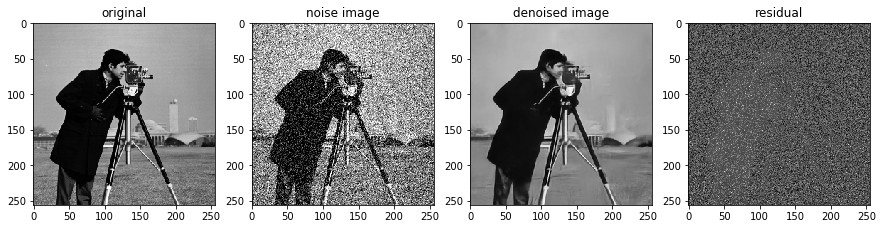

-186.0 -93.28401184082031 93.71598815917969 188.0


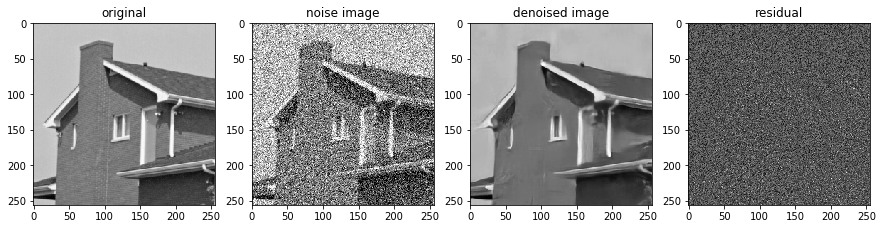

-168.0 -83.71929168701172 93.78070831298828 187.0


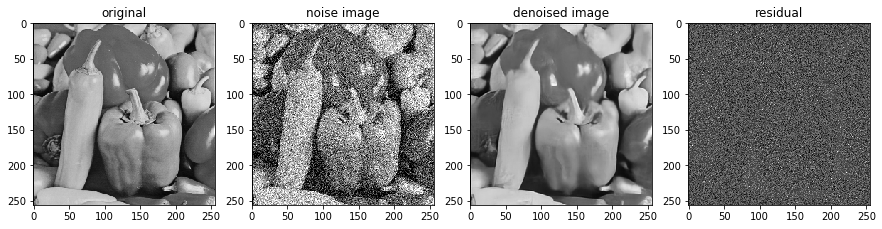

-169.0 -84.59185791015625 99.40814208984375 199.0


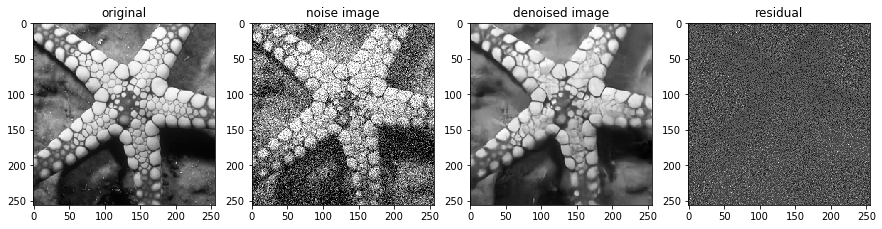

-197.0 -98.23768615722656 93.26231384277344 186.0


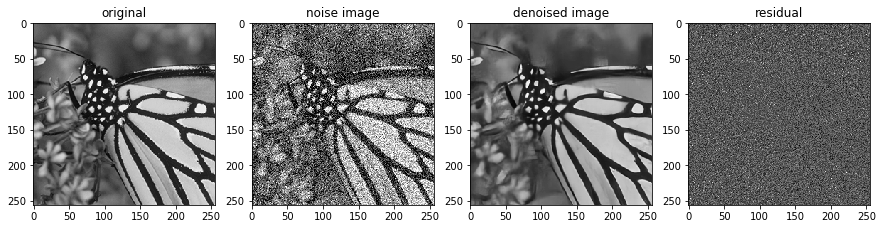

-191.0 -97.02334594726562 80.47665405273438 164.0


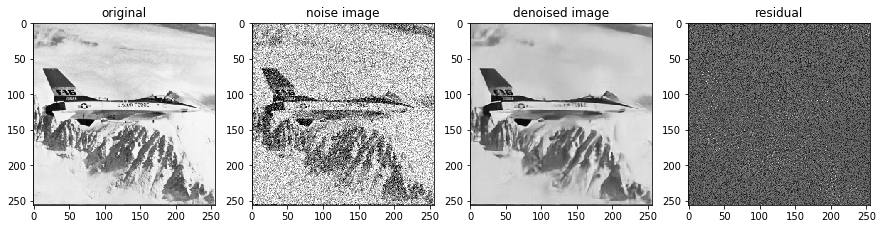

-189.0 -93.48049926757812 98.01950073242188 194.0


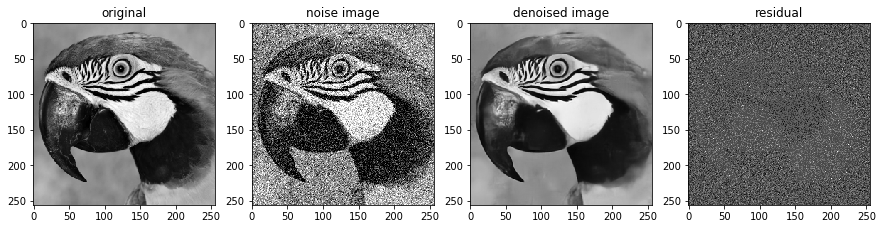

-192.0 -95.86172485351562 91.63827514648438 183.0


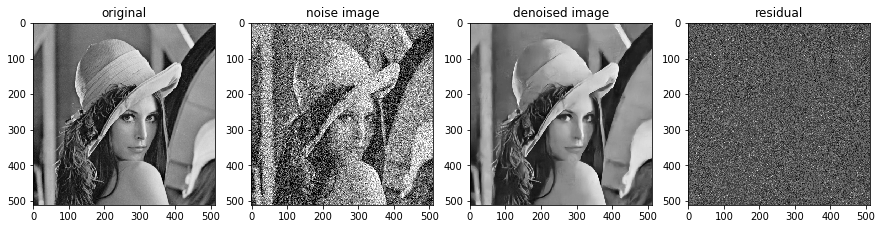

-198.0 -98.57156372070312 100.92843627929688 201.0


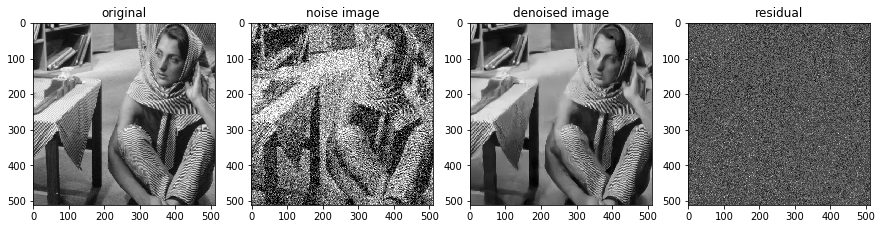

-182.0 -90.72225952148438 91.27774047851562 182.0


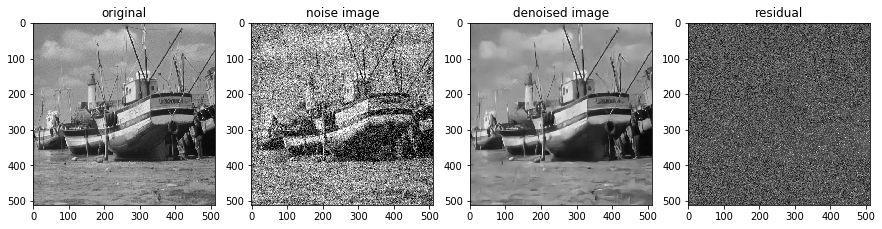

-182.0 -90.49874114990234 99.50125885009766 198.0


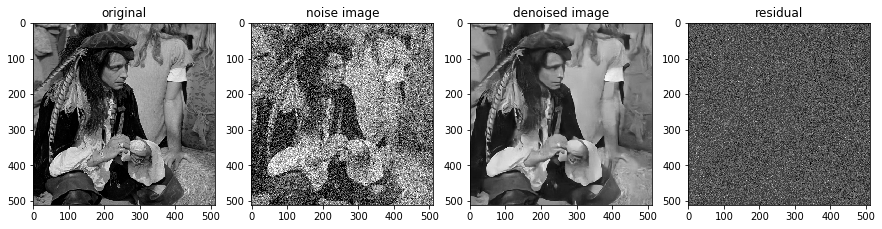

-176.0 -87.68550109863281 101.81449890136719 203.0


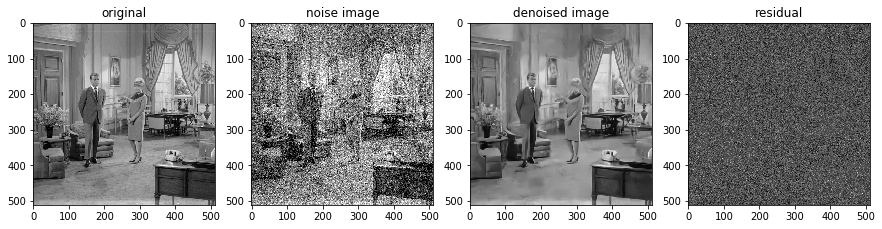

In [152]:
show_residual('Set12', 50)